### ML Model for extracting a satchel image.


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from keras.preprocessing.image import load_img
import numpy as np
from torchvision import transforms
import matplotlib.pyplot as plt
import PIL as PIL
from google.colab import drive
from keras.backend import squeeze
drive.mount('/content/drive')
# load the image

print("TensorFlow version:", tf.__version__)

ImportError: ignored

In [ ]:
num_classes = 2
img_height = 260
img_width = 260

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  tf.keras.layers.RandomCrop(height=224, width=224, seed=123),
  tf.keras.layers.RandomContrast(factor=(0.1, 0.5), seed=123),
  tf.keras.layers.RandomRotation(factor=(-0.1, 0.1), fill_mode='nearest', seed=123),
  tf.keras.layers.Conv2D(16, 4, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(), # Pixel amount has been halved. e.g. 32 /2 = 16pixels 
  tf.keras.layers.Conv2D(32, 2, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 1, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(320, activation='relu'),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(160, activation='relu'),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
img_height = 260
img_width = 260
batch_size = 32
y_labels = [0,1]


#                      METHOD 1
# ==================================================== #
#             Using dataset_from_directory             #
# ==================================================== #
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Roshstein Bot/Train Data/",
    labels="inferred",
    label_mode="int",  # categorical, binary
    class_names=['0', '1'],
    color_mode="grayscale",
    batch_size=batch_size,
    image_size=(img_height, img_width),  # reshape if not in this size
    shuffle=True,
    seed=123,
    validation_split=0.2,
    
    subset="training",
)

ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Roshstein Bot/Train Data/",
    labels="inferred",
    label_mode="int",  # categorical, binary
    class_names=['0', '1'],
    color_mode="grayscale",
    batch_size=batch_size,
    image_size=(img_height, img_width),  # reshape if not in this size
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
)

ds_test = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Roshstein Bot/Test Data",
    labels="inferred",
    label_mode="int",  # categorical, binary
    color_mode="grayscale",
    batch_size=1,
    image_size=(img_height, img_width),  # reshape if not in this size

)

print(len(ds_train))
ds_train = ds_train.repeat(count=5)
ds_validation = ds_validation.repeat(count=5)
print(len(ds_train))

#layer = tf.keras.layers.experimental.preprocessing.Normalization()
#layer.adapt(ds_train)




def augment(x, y):
    image = tf.image.random_brightness(x, max_delta=0.05)
    return image, y




Found 3088 files belonging to 2 classes.
Using 2471 files for training.
Found 3088 files belonging to 2 classes.
Using 617 files for validation.
Found 12 files belonging to 2 classes.
78
390


In [ ]:
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.1, momentum=0.9),
    loss=[keras.losses.BinaryCrossentropy(from_logits=False),],
    metrics=["accuracy"],
)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(
    ds_train,
    epochs=20,
    verbose=2,
    shuffle=True,
    validation_data=ds_validation,
    validation_steps=1,
)

Epoch 1/20
390/390 - 293s - loss: 0.2659 - accuracy: 0.8936 - val_loss: 0.0293 - val_accuracy: 1.0000 - 293s/epoch - 751ms/step
Epoch 2/20
390/390 - 71s - loss: 0.1581 - accuracy: 0.9420 - val_loss: 0.0979 - val_accuracy: 0.9688 - 71s/epoch - 183ms/step
Epoch 3/20
390/390 - 71s - loss: 0.1164 - accuracy: 0.9597 - val_loss: 0.1212 - val_accuracy: 0.9688 - 71s/epoch - 182ms/step
Epoch 4/20
390/390 - 71s - loss: 0.0946 - accuracy: 0.9685 - val_loss: 0.0371 - val_accuracy: 0.9688 - 71s/epoch - 181ms/step
Epoch 5/20
390/390 - 69s - loss: 0.0794 - accuracy: 0.9741 - val_loss: 0.1439 - val_accuracy: 0.9688 - 69s/epoch - 178ms/step
Epoch 6/20
390/390 - 71s - loss: 0.0678 - accuracy: 0.9773 - val_loss: 0.0236 - val_accuracy: 1.0000 - 71s/epoch - 181ms/step
Epoch 7/20
390/390 - 70s - loss: 0.0562 - accuracy: 0.9811 - val_loss: 0.0058 - val_accuracy: 1.0000 - 70s/epoch - 181ms/step
Epoch 8/20
390/390 - 70s - loss: 0.0476 - accuracy: 0.9848 - val_loss: 0.1133 - val_accuracy: 0.9688 - 70s/epoch - 1

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/Roshstein Bot/Saved A.I", "Rosh A.I")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Roshstein Bot/Saved A.I/assets


In [ ]:
tf.keras.utils.plot_model(model = model , rankdir="LR", dpi=64, show_shapes=True)

In [ ]:

def valid_imshow_data(data):
    data = np.asarray(data)
    if data.ndim == 2:
        return True
    elif data.ndim == 3:
        if 3 <= data.shape[2] <= 4:
            return True
        else:
            print('The "data" has 3 dimensions but the last dimension '
                  'must have a length of 3 (RGB) or 4 (RGBA), not "{}".'
                  ''.format(data.shape[2]))
            return False
    else:
        print('To visualize an image the data must be 2 dimensional or '
              '3 dimensional, not "{}".'
              ''.format(data.ndim))
        return False



evaluate_model = model.evaluate(ds_test)


for images, labels in ds_test: 
    print(1)
    predictions = model.predict(images)
    score = tf.nn.softmax(predictions)
    numpy_labels = labels.numpy()
    print(
       "This image most likely belongs to {} with a {:.2f} percent confidence. \n The correct answer is: {}"
       .format(y_labels[np.argmax(score)], 100 * np.max(score), numpy_labels)
    )


12/12 [==============================] - 1s 25ms/step - loss: 0.0940 - accuracy: 1.0000
1
This image most likely belongs to 1 with a 99.56 percent confidence. 
 The correct answer is: [1]
1
This image most likely belongs to 1 with a 56.39 percent confidence. 
 The correct answer is: [1]
1
This image most likely belongs to 1 with a 93.57 percent confidence. 
 The correct answer is: [1]
1
This image most likely belongs to 0 with a 99.86 percent confidence. 
 The correct answer is: [0]
1
This image most likely belongs to 1 with a 99.63 percent confidence. 
 The correct answer is: [1]
1
This image most likely belongs to 1 with a 99.69 percent confidence. 
 The correct answer is: [1]
1
This image most likely belongs to 1 with a 100.00 percent confidence. 
 The correct answer is: [1]
1
This image most likely belongs to 1 with a 99.96 percent confidence. 
 The correct answer is: [1]
1
This image most likely belongs to 1 with a 94.70 percent confidence. 
 The correct answer is: [1]
1
This imag

IndexError: ignored

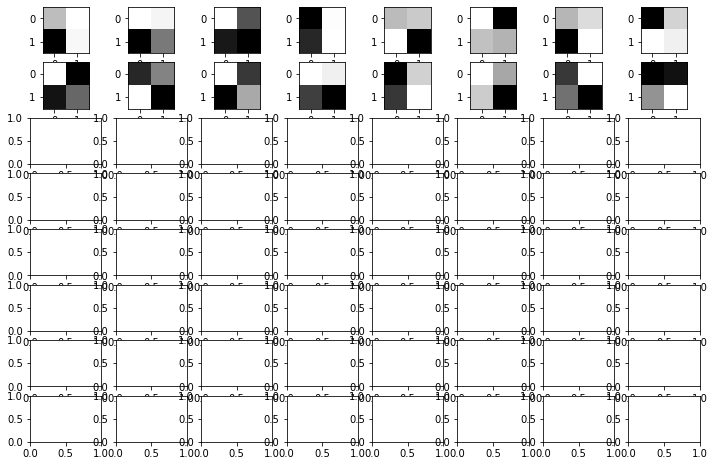

In [ ]:
1
2
3
4
5
6
7
8
9
10
11
#get_weights [x, y, channel, nth convolutions layer ]
weight_conv2d_1 = model.layers[4].get_weights()[0][:,:,0,:]
 
col_size = 8
row_size = 8
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gist_yarg_r")
    filter_index += 1

IndexError: ignored

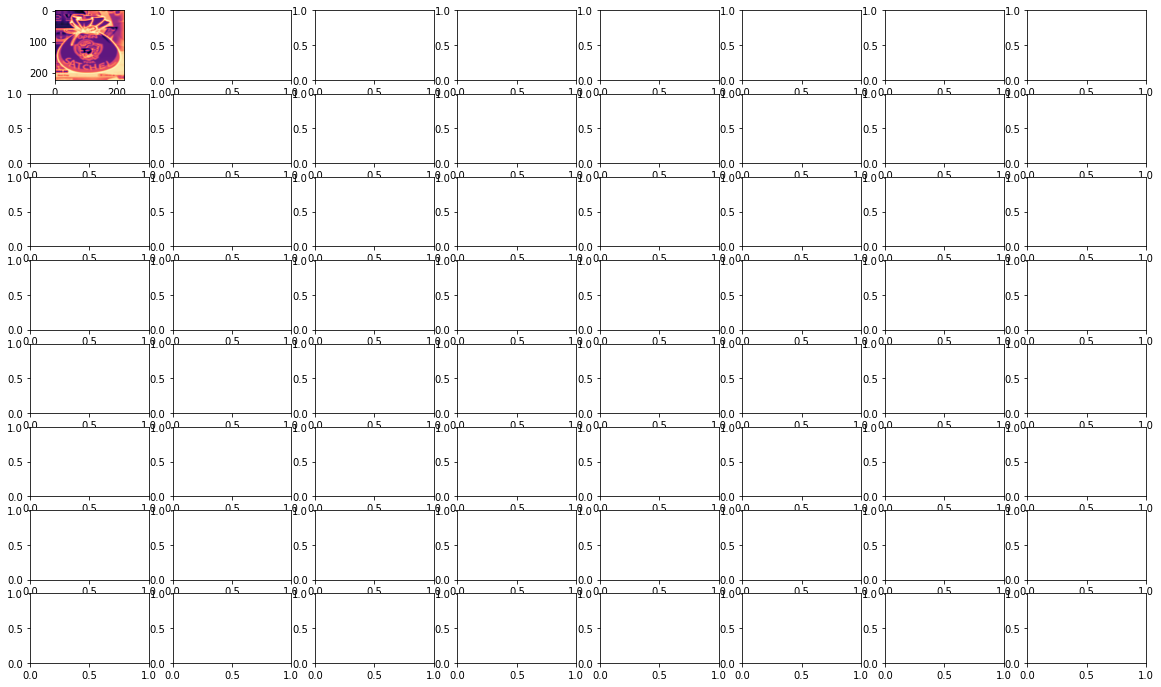

In [ ]:
from keras.models import Model
from matplotlib import pyplot as plt

layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(ds_test)
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))

    for row in range(0,row_size): 
      for col in range(0,col_size):
        ax[row][col].imshow(activation[0, :, :,activation_index], cmap='magma_r')
        activation_index += 1
#'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 
#'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 
#'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 
#'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 
#'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
#'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 
#'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r',
# 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean',

display_activation(activations, 8, 8, 1)
display_activation(activations, 8, 8, 2)
display_activation(activations, 8, 8, 3)
display_activation(activations, 8, 8, 4)
display_activation(activations, 8, 8, 5)
display_activation(activations, 8, 8, 6)
display_activation(activations, 8, 8, 7)

In [ ]:
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(ds_test)


#W1 = model.layers[1].get_weights()
#W2 = model.layers[3].get_weights()
#W3 = model.layers[3].get_weights()
#W4 = model.layers[4].get_weights()
#W5 = model.layers[5].get_weights()
#W6 = model.layers[8].get_weights()
#W7 = model.layers[7].get_weights()
W8 = activation_model.layers[13].get_weights()

#npW1 = np.array(W1[0])
#npW2 = np.array(W2[0])
#npW3 = np.array(W3[0])
#npW4 = np.array(W4)
#npW5 = np.array(W5[0])
#npW6 = np.array(W6[0])
#npW7 = np.array(W7)
npW8 = np.array(W8[0])


#plt.imshow(npW1, aspect='equal', origin='lower')
#cax = plt.axes([0.85, 0.1, 0.075, 0.8])
#plt.colorbar(cax=cax)
#plt.show()
#plt.imshow(npW2, aspect='equal')
#cax = plt.axes([0.85, 0.1, 0.075, 0.8])
#plt.colorbar(cax=cax)
#plt.show()
#plt.imshow(npW3, aspect='equal')
#cax = plt.axes([0.85, 0.1, 0.075, 0.8])
#plt.colorbar(cax=cax)
#plt.show()
#plt.imshow(npW4, aspect='equal')
#cax = plt.axes([0.85, 0.1, 0.075, 0.8])
#plt.colorbar(cax=cax)
#plt.show()
#plt.imshow(npW5)
#cax = plt.axes([0.85, 0.1, 0.06, 0.8])
#plt.colorbar(cax=cax)
#plt.show()
#plt.imshow(npW6, aspect='equal')
#cax = plt.axes([0.85, 0.1, 0.06, 0.8])
#plt.colorbar(cax=cax)
#plt.show()
plt.imshow(npW8)
cax = plt.axes([0.85, 0.1, 0.06, 0.8])
plt.colorbar(cax=cax)
plt.show()

In [ ]:
from ctypes.wintypes import HWND
import PIL.ImageGrab as ImageGrab
from PIL import Image, ImageOps
from keras.preprocessing.image import img_to_array 
import numpy as np
import pyautogui
import win32gui
import pywintypes
import tensorflow as tf

y_labels = ["*Not Found*", "*Found Satchel*"]
model = tf.keras.models.load_model("C:/Users/Sollo/Desktop/Saved A.I")   
print(model.summary())

winlist = []
#hwnd = pywintypes.HANDLE()

class ScreenCapture:
    def __init__(self):
        Bbox = (590, 110, 900, 600) # Format : (left, upper, right, lower)
        
        screen_name = 'ROSHTEIN - Twitch - Google Chrome'
        screens = self.get_screens(screen_name)
        i = 0
        print(screens)
        #print(win32gui.GetWindowRect(screens[0][0]))
        cont = True
        while cont:
            window = screens[0][0]
            try:
                    win32gui.SetForegroundWindow(window)
                    img = ImageGrab.grab(bbox=Bbox)
                    if i < 5:
                        img.show()
                    img = ImageOps.grayscale(img)
                    img = img.resize((224, 224))
                    img = img_to_array(img) 
                    img = img.reshape(-1,224,224,1)
                    #img.save('C:/Users/Sollo/Desktop/screeny.png')
                    predictions = model.predict(img)
                    
                    score = tf.nn.softmax(predictions)
                    #print(y_labels[np.argmax(score)])
                    print("This image most likely belongs to ",y_labels[np.argmax(score)],  " with a ", 100 * np.max(score), " percent confidence.")
                    if y_labels[np.argmax(score)] == "Found Satchel":
                      for i in screens:
                        win32gui.SetForegroundWindow(i[0][0])
                        self.enter_text()
                    i += 1
            except:
                print("There was an error...Wrong Window selected")
            time.sleep(3)
            
    def enter_text(self):
      pyautogui.moveTo(1400, 784)
      pyautogui.click()
      pyautogui.write("roshGold", interval=0.1)
      pyautogui.press('enter')
      pyautogui.write("roshSatchel", interval=0.1)
      pyautogui.press('enter')
    
    def get_screens(self, screen_name):
        win32gui.EnumWindows(enum_cb, winlist)
        screens = [(hwnd, title) for hwnd, title in winlist if screen_name in title]
        while len(screens) == 0:
            screens = [(hwnd, title) for hwnd, title in winlist if screen_name in title]
            win32gui.EnumWindows(enum_cb, winlist)

        return screens

def enum_cb(hwnd, results):
    winlist.append((hwnd, win32gui.GetWindowText(hwnd)))
    

ScreenCapture()

import pyautogui, sys
print('Press Ctrl-C to quit.')
try:
    while True:
        x, y = pyautogui.position()
        positionStr = 'X: ' + str(x).rjust(4) + ' Y: ' + str(y).rjust(4)
        print(positionStr, end='')
        print('\b' * len(positionStr), end='', flush=True)
except KeyboardInterrupt:
    print('\n')
